In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [36]:
df = pd.read_csv("./Mall_Customers.csv")
# df.head()
# df.shape
# df.describe()
# df.describe(include=['O'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df = df.iloc[:, 3:5]
X = df.values

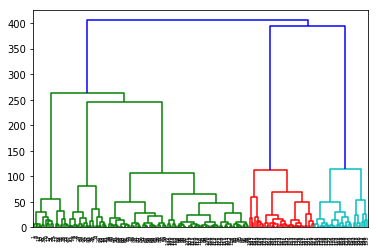

In [4]:
import scipy
from scipy.cluster import hierarchy
den=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

In [5]:
from sklearn.cluster import KMeans
err = []
for i in range(1,10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X)
    err.append(km.inertia_)

Text(0,0.5,'error')

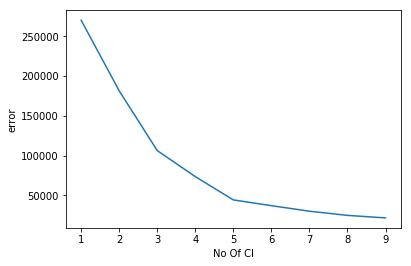

In [6]:
plt.plot(range(1,10), err)
plt.xlabel("No Of Cl")
plt.ylabel("error")

In [31]:
km = KMeans(n_clusters=5)
km.fit(X)
cp = km.predict(X)
cen = km.cluster_centers_

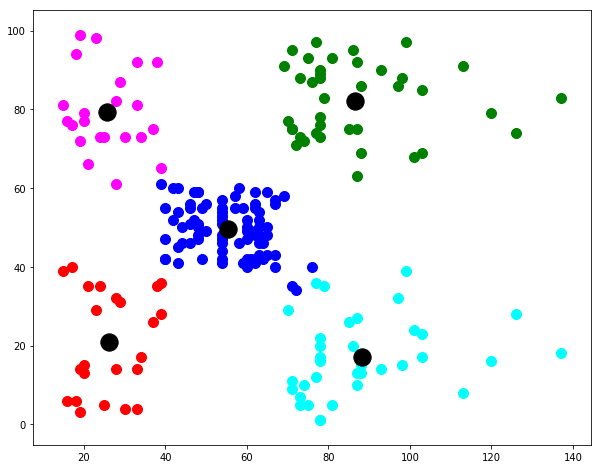

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X[cp==0,0], X[cp==0,1], s=100, c='red', label='c-1')
plt.scatter(X[cp==1,0], X[cp==1,1], s=100, c='blue', label='c-2')
plt.scatter(X[cp==2,0], X[cp==2,1], s=100, c='green', label='c-3')
plt.scatter(X[cp==3,0], X[cp==3,1], s=100, c='cyan', label='c-4')
plt.scatter(X[cp==4,0], X[cp==4,1], s=100, c='magenta', label='c-5')
plt.scatter(cen[:,0], cen[:,1], s=300, c='black', label='cen')